In [13]:
from GPA import GPA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
from scipy.signal import periodogram
from matplotlib.gridspec import GridSpec
import cv2

In [2]:
ga = GPA(0.03)
ga.version()

b'GPA - 3.5'

# Aspect Ratio

In [118]:
def convert2CV2(mat):
    m2 = (mat-np.min(mat))/(np.max(mat)-np.min(mat))
    m2 = m2*255
    m2 = m2.astype(np.uint8)
    return m2
def getBlobSizes(d):
    _,th = cv2.threshold(convert2CV2(d),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    contours, hierarchy = cv2.findContours(th, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    blobSide = []
    for c in contours:
        (cx,cy),(w,h),theta = cv2.minAreaRect(c)
        blobSide.append(np.max([w,h])) 
    return blobSide

def getBlobStatistics(img):
    normedBlobSize = getBlobSizes(img)/np.max(img.shape)
    #print(normedBlobSize)
    return np.average(normedBlobSize), np.std(normedBlobSize)

## Without Noise

In [119]:
data = np.load("data/withoutNoise/data.npy")
times = np.load("data/withoutNoise/times.npy")

In [120]:
avgs,stds = [],[]
for d in data:
    avg,std = getBlobStatistics(np.real(d))
    avgs.append(avg)
    stds.append(std)

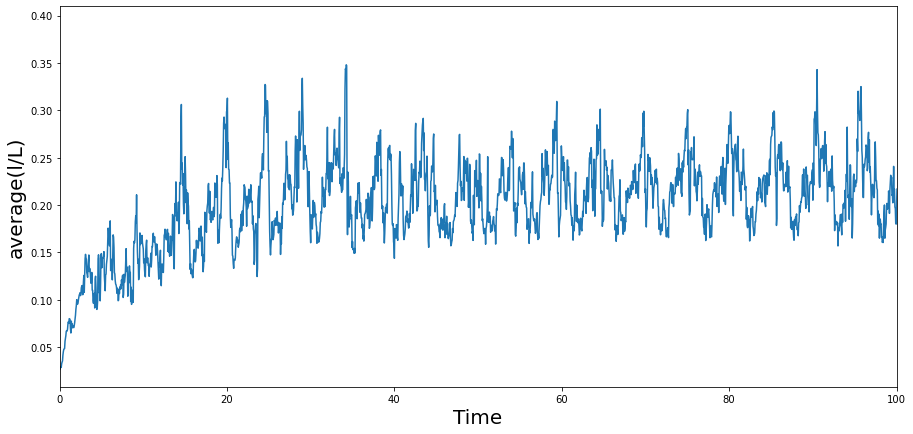

In [121]:
plt.figure(figsize=(15,7))
plt.plot(np.arange(len(avgs))/20,avgs)
plt.ylabel("average(l/L)",fontsize=20)
plt.xlabel("Time",fontsize=20)
plt.xlim(0,100)
plt.show()

## Additive Noise

In [122]:
data = np.load("data/additiveNoise/data.npy")
times = np.load("data/additiveNoise/times.npy")

In [123]:
avgs,stds = [],[]
for d in data:
    avg,std = getBlobStatistics(np.real(d))
    avgs.append(avg)
    stds.append(std)

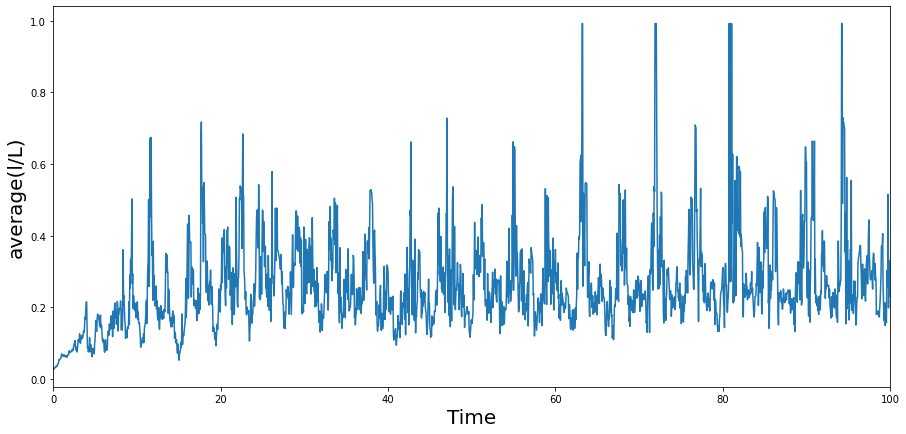

In [124]:
plt.figure(figsize=(15,7))
plt.plot(np.arange(len(avgs))/20,avgs)
plt.ylabel("average(l/L)",fontsize=20)
plt.xlabel("Time",fontsize=20)
plt.xlim(0,100)
plt.show()

## Multiplicative

In [125]:
data = np.load("data/multiplicativeNoise/data.npy")
times = np.load("data/multiplicativeNoise/times.npy")

In [126]:
avgs,stds = [],[]
for d in data:
    avg,std = getBlobStatistics(np.real(d))
    avgs.append(avg)
    stds.append(std)

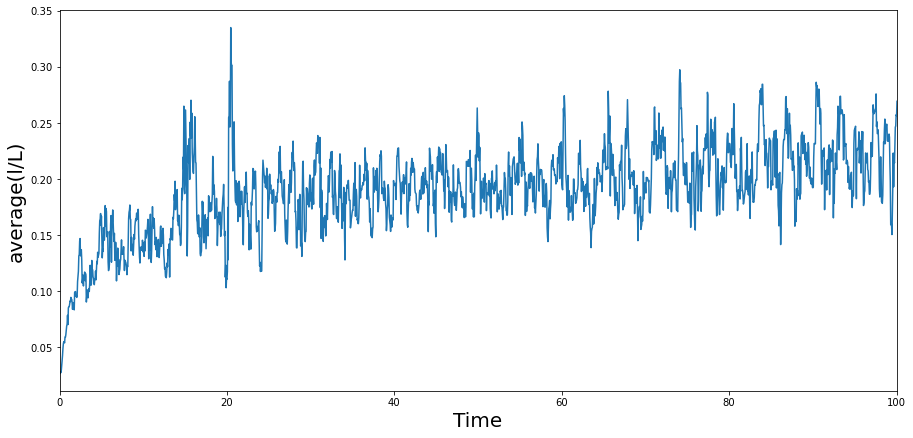

In [127]:
plt.figure(figsize=(15,7))
plt.plot(np.arange(len(avgs))/20,avgs)
plt.ylabel("average(l/L)",fontsize=20)
plt.xlabel("Time",fontsize=20)
plt.xlim(0,100)
plt.show()

# Spatial Autocorrelation

In [3]:
def spatialCorrelation(mat,steps = None):
    dx = []
    dy = []
    step=[]
    
    if steps == None:
        s2 = np.arange(1,np.min(mat.shape)//2)
    else:
        s2 = steps
    m2 = mat.copy()
    m = (m2 - np.average(m2))/np.std(m2)
    for s in s2:
        dy.append(np.average(m[s:,:]*m[:-s,:]))
        dx.append(np.average(m[:,s:]*m[:,:-s]))
        step.append(s)
    dx,dy,step = np.array(dx),np.array(dy),np.array(step)
    return dx,dy,step

def temporalCorrelation(mats,steps = None):
    dt = []
    step=[]
    
    if steps == None:
        s2 = np.arange(1,mats.shape[0]//2)
    else:
        s2 = steps
    m2 = mats[:,mats.shape[1]//2,mats.shape[2]//2]
    m = (m2 - np.average(m2))/np.std(m2)
    for s in s2:
        dt.append(np.average(m[s:]*m[:-s]))
        step.append(s)
    dt,step = np.array(dt),np.array(step)
    return dt,step

### Without Noise

In [4]:
data = np.load("data/withoutNoise/data.npy")
times = np.load("data/withoutNoise/times.npy")

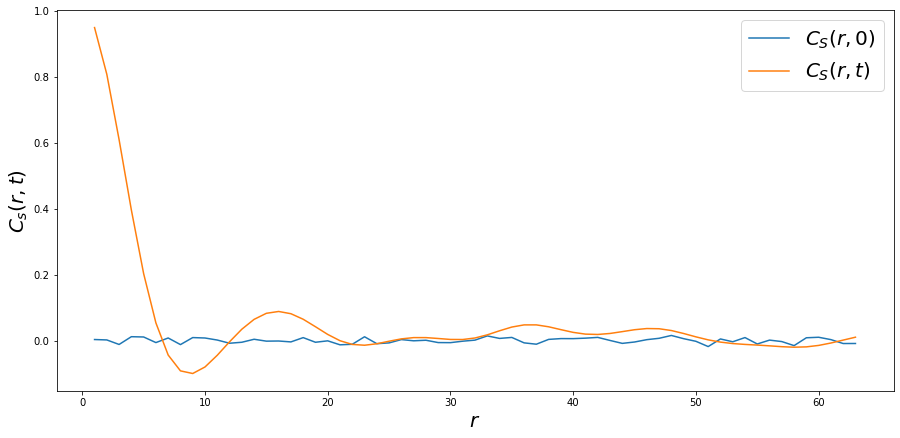

In [5]:
dx0,dy,step = spatialCorrelation(np.real(data[0]))
plt.figure(figsize=(15,7))
plt.plot(step,dx0,label=f'$C_S(r,0)$')
dx,dy,step = spatialCorrelation(np.real(data[-1]))
plt.plot(step,dx,label=f'$C_S(r,t)$')
plt.legend(fontsize=20)
plt.xlabel("$r$",fontsize=20)
plt.ylabel("$C_s(r,t)$",fontsize=20)
plt.show()

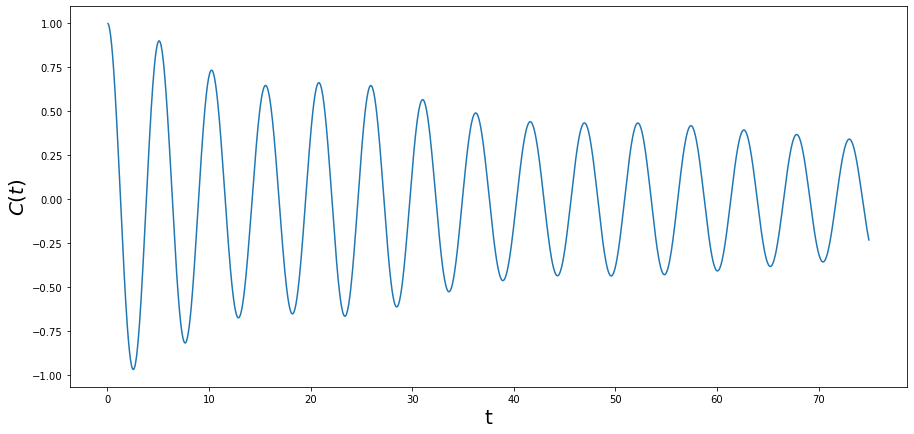

In [6]:
dt,step = temporalCorrelation(np.real(data))
plt.figure(figsize=(15,7))
plt.plot(step*0.05,dt,label=f'$C(t)$')
plt.xlabel("t",fontsize=20)
plt.ylabel("$C(t)$",fontsize=20)
plt.show()

### Additive Noise

In [7]:
data = np.load("data/additiveNoise/data.npy")
times = np.load("data/additiveNoise/times.npy")

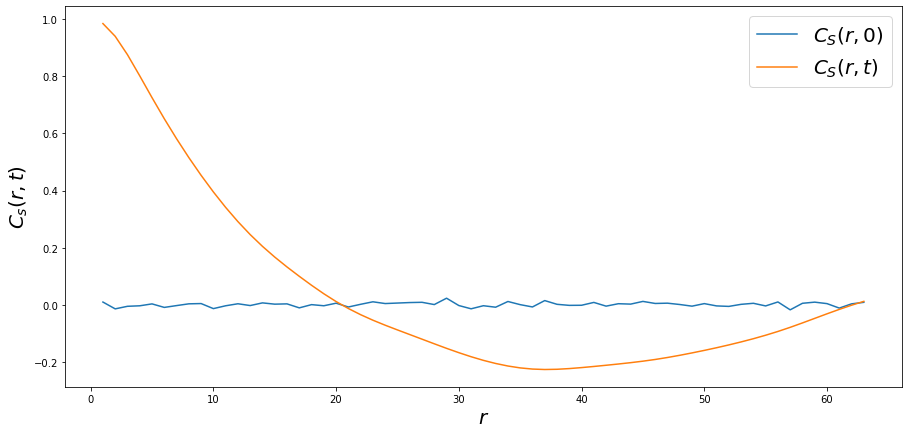

In [8]:
dx0,dy,step = spatialCorrelation(np.real(data[0]))
plt.figure(figsize=(15,7))
plt.plot(step,dx0,label=f'$C_S(r,0)$')
dx,dy,step = spatialCorrelation(np.real(data[-1]))
plt.plot(step,dx,label=f'$C_S(r,t)$')
plt.legend(fontsize=20)
plt.xlabel("$r$",fontsize=20)
plt.ylabel("$C_s(r,t)$",fontsize=20)
plt.show()

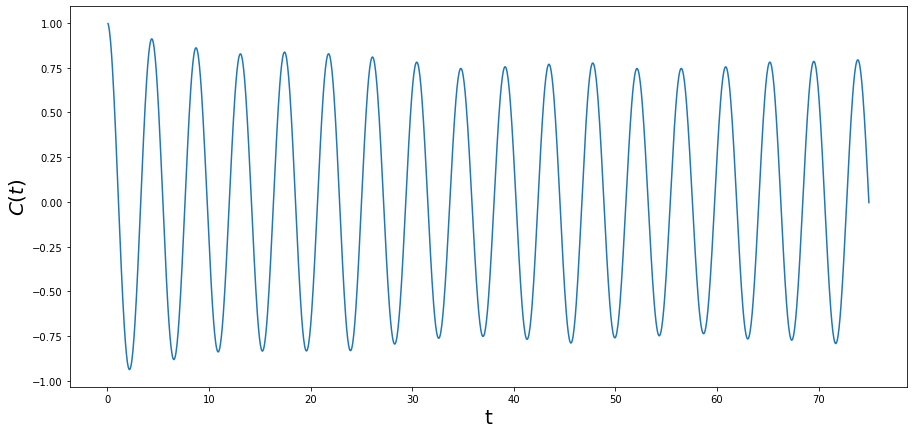

In [9]:
dt,step = temporalCorrelation(np.real(data))
plt.figure(figsize=(15,7))
plt.plot(step*0.05,dt,label=f'$C(t)$')
plt.xlabel("t",fontsize=20)
plt.ylabel("$C(t)$",fontsize=20)
plt.show()

### Multplicative Noise

In [10]:
data = np.load("data/multiplicativeNoise/data.npy")
times = np.load("data/multiplicativeNoise/times.npy")

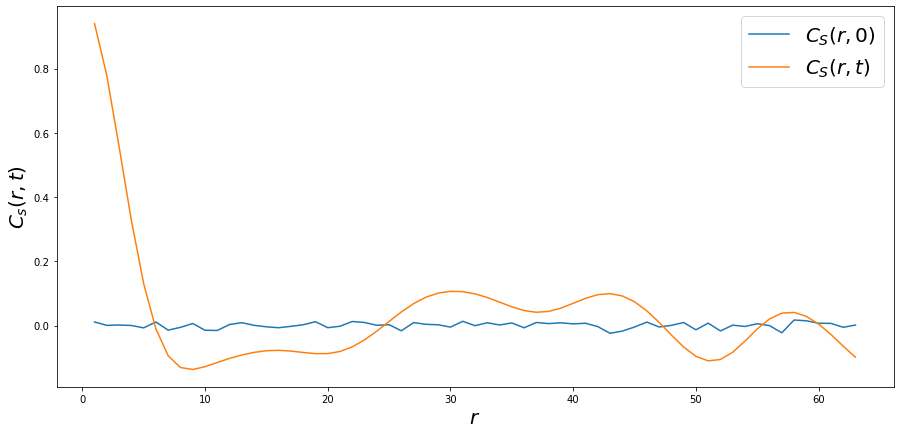

In [11]:
dx0,dy,step = spatialCorrelation(np.real(data[0]))
plt.figure(figsize=(15,7))
plt.plot(step,dx0,label=f'$C_S(r,0)$')
dx,dy,step = spatialCorrelation(np.real(data[-1]))
plt.plot(step,dx,label=f'$C_S(r,t)$')
plt.legend(fontsize=20)
plt.xlabel("$r$",fontsize=20)
plt.ylabel("$C_s(r,t)$",fontsize=20)
plt.show()

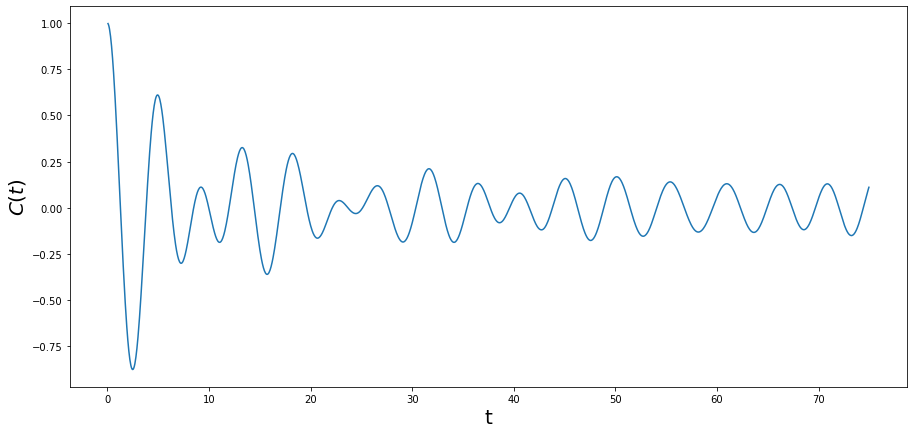

In [12]:
dt,step = temporalCorrelation(np.real(data))
plt.figure(figsize=(15,7))
plt.plot(step*0.05,dt,label=f'$C(t)$')
plt.xlabel("t",fontsize=20)
plt.ylabel("$C(t)$",fontsize=20)
plt.show()